# Python Assignment 

In [1]:
pip list #checking the installed packages 

Package                            Version
---------------------------------- --------------------
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-navigator                 2.1.1
anaconda-project                   0.10.2
anyio                              2.2.0
appdirs                            1.4.4
APScheduler                        3.6.3
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            5.0
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.6.0
Babel                              2.9.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.

In [1]:
# Lets import the neccesary libraries to complete the assignment 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #to plot with matplotlib
import unittest #for unit testing
import os

#for mathematical operations
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#to plot with Bokeh
from bokeh.io import output_notebook, output_file
from bokeh.plotting import figure,show
from bokeh.layouts import gridplot
from bokeh.plotting import figure

from scipy.optimize import curve_fit #curve fitting

from pylab import * 

from sqlalchemy import *

pd.set_option('mode.chained_assignment', None) #'pandas.options.mode.chained_assignment' setted to none=ignoring the warning

In [2]:
#used pd.read_csv to read all data provided to us for the assignment. In this case is the pandas method to read csv files.

Train_data = pd.read_csv('train.csv') 
Ideal_data = pd.read_csv('ideal.csv') 
Test_data = pd.read_csv('test.csv')

In [3]:
#assigning X and Y

Train_X = Train_data['x']
Ideal_X = Ideal_data['x']

Train_Y1 = Train_data['y1']
Train_Y2 = Train_data['y2']
Train_Y3 = Train_data['y3']
Train_Y4 = Train_data['y4']

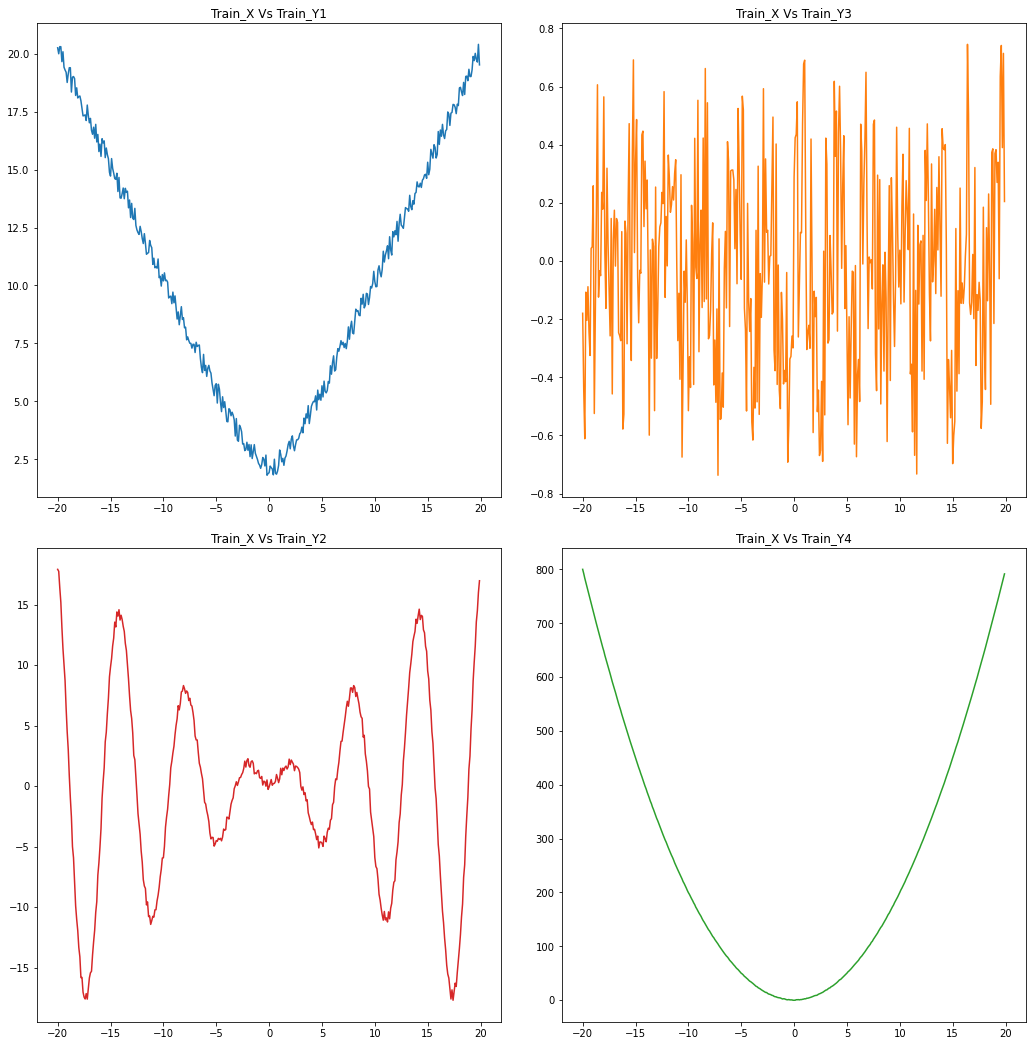

In [4]:
#Using matplotlib to plot the training data

fig, axs = plt.subplots(2,2, figsize=(15,15)) # generating the different plots (subplots) at once

#'tight_layout' helps adjusting subplots so they fit into the figure area, 'pad' controls the padding around the figure border & subplots
fig.tight_layout(pad=3)

# Plotting 4 figures, the 'axs[value,value]' allows to place graphs in the desire position
axs[0,0].plot(Train_X, Train_Y1)  
axs[0,0].set_title('Train_X Vs Train_Y1',)

axs[1,0].plot(Train_X, Train_Y2, 'tab:red')
axs[1,0].set_title('Train_X Vs Train_Y2')

axs[0, 1].plot(Train_X, Train_Y3, 'tab:orange')
axs[0, 1].set_title('Train_X Vs Train_Y3')

axs[1,1 ].plot(Train_X, Train_Y4, 'tab:green')
axs[1, 1].set_title('Train_X Vs Train_Y4')

plt.show()

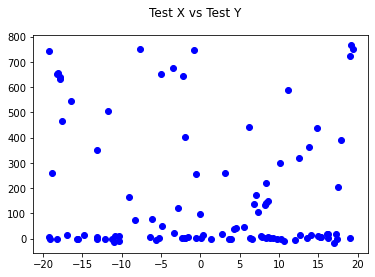

In [5]:
#using matplotlib to plot the test data
plt.scatter(Test_data['x'], Test_data['y'], color='b')
plt.suptitle('Test X vs Test Y')
plt.show()

In [6]:
#Using Bokeh to plot the training data

from bokeh.io import curdoc # importing curdoc to change the theme colour 
curdoc().theme = 'dark_minimal'
output_file('Output.html') #the output file will open in another window (html format)
output_notebook() #this is to also dysplay the plots in this notebook



# 4 plots will be display
b_graph1=figure(width=600, plot_height=600,title='X vs Train_Y1 ') #1st graph for X vs Y1
b_graph1.triangle(Train_X,Train_Y1, size=12, color='cyan', alpha=0.5)

b_graph2=figure(width=600, plot_height=600,title='X vs Train_Y3 ')#2nd graph for X vs Y3
b_graph2.circle(Train_X,Train_Y3,size=12, color='yellow', alpha=0.5)

b_graph3=figure(width=600, plot_height=600,title='X vs Train_Y2')#3rd graph for X vs Y2
b_graph3.circle(Train_X,Train_Y2,size=12, color='red', alpha=0.5)

b_graph4=figure(width=600, plot_height=600,title='X vs Train_Y4 ')#4th graph for X vs Y4
b_graph4.circle(Train_X,Train_Y4,size=12, color='green', alpha=0.5)

#grouping all plots in a gridformat following 'p = gridplot([[s1, s2], [s3, s3]])'
p= gridplot([[b_graph1,b_graph2],[b_graph3,b_graph4]])

#display plots
show(p)


Loading BokehJS ...

In [4]:

#The function 'np.polyfit()' is use to find the least square polynomial fit
Model_A = np.polyfit(Train_X, Train_Y1, 3)
Model_B = np.polyfit(Train_X, Train_Y2, 3) 
Model_C = np.polyfit(Train_X, Train_Y3, 3) 
Model_D = np.polyfit(Train_X, Train_Y4, 3)

In [5]:
#using 'np.poly1d', one-dimentional class 
Prediction_1 = np.poly1d(Model_A)
Prediction_2 = np.poly1d(Model_B)
Prediction_3 = np.poly1d(Model_C)
Prediction_4 = np.poly1d(Model_D)

In [6]:
#setting models variables 
y_model_1= Prediction_1(Ideal_X)
y_model_2 = Prediction_2(Ideal_X)
y_model_3 = Prediction_3(Ideal_X)
y_model_4 = Prediction_4(Ideal_X)

In [7]:
# to meassure erro and or performance it is important that we use these:

# MAE=mean absolute error
mae_y1 = mean_absolute_error(Train_Y1, Prediction_1(Train_X))
mae_y2 = mean_absolute_error(Train_Y2, Prediction_2(Train_X))
mae_y3 = mean_absolute_error(Train_Y3, Prediction_3(Train_X))
mae_y4 = mean_absolute_error(Train_Y4, Prediction_4(Train_X))


print("Mean Absolute Error (MAE)")
print("Model 1 :", mae_y1)
print("Model 2 :", mae_y2)
print("Model 3 :", mae_y3)
print("Model 4 :", mae_y4)
print("--------------------------------------------")

# MSE= mean squared error
mse_y1 = mean_squared_error(Train_Y1, Prediction_1(Train_X))
mse_y2 = mean_squared_error(Train_Y2, Prediction_2(Train_X))
mse_y3 = mean_squared_error(Train_Y3, Prediction_3(Train_X))
mse_y4 = mean_squared_error(Train_Y4, Prediction_4(Train_X))

print("Mean Squared Error (MSE)")
print("Model 1 :", mse_y1)
print("Model 2 :", mse_y2)
print("Model 3 :", mse_y3)
print("Model 4 :", mse_y4)

# R2 Scores= Coefficient of determination
r2_y1 = r2_score(Train_Y1, Prediction_1(Train_X))
r2_y2 = r2_score(Train_Y2, Prediction_2(Train_X))
r2_y3 = r2_score(Train_Y3, Prediction_3(Train_X))
r2_y4 = r2_score(Train_Y4, Prediction_4(Train_X))
print("--------------------------------------------")
print("R2 Score for models is as follows")
print("Model 1 :", r2_y1)
print("Model 2 :", r2_y2)
print("Model 3 :", r2_y3)
print("Model 4 :", r2_y4)


Mean Absolute Error (MAE)
Model 1 : 1.0308556390900585
Model 2 : 6.224044825172005
Model 3 : 0.27585543045991917
Model 4 : 0.23717071435602385
--------------------------------------------
Mean Squared Error (MSE)
Model 1 : 1.423061634712547
Model 2 : 62.91322362999072
Model 3 : 0.11185523983138528
Model 4 : 0.07775805562528032
--------------------------------------------
R2 Score for models is as follows
Model 1 : 0.952407374644923
Model 2 : 0.0040690367879677725
Model 3 : 0.01467980174077732
Model 4 : 0.9999986331721757


In [8]:
#Finging the ideal functions 
def ideal_function(train_data, ideal_data):
    
    if not isinstance(train_data, pd.Series):
        raise MyException(train_data, "Exception raised! {} Must be a Pandas series".format(train_data))
        
    squared_sum = []
    for j in range(1, len(ideal_data.columns)):
        squared_sum.append((j, sum(abs(train_data - ideal_data['y'+str(j)].values))))
    squared_sum.sort(key = lambda x: x[1]) 
    return squared_sum[0]

Ideal_Y1  = ideal_function(Train_Y1, Ideal_data)
Ideal_Y2  = ideal_function(Train_Y2, Ideal_data)
Ideal_Y3  = ideal_function(Train_Y3, Ideal_data)
Ideal_Y4  = ideal_function(Train_Y4, Ideal_data)


print("Ideal Function (Y1) is:", "y" + str(Ideal_Y1[0]),"," ' Ideal Function (Y2) is:',"y" + str(Ideal_Y2[0]))
print("Ideal Function (Y3) is:", "y" + str(Ideal_Y3[0]), "," ' Ideal Function (Y4) is:', "y" + str(Ideal_Y4[0]))


Ideal Function (Y1) is: y33 , Ideal Function (Y2) is: y10
Ideal Function (Y3) is: y48 , Ideal Function (Y4) is: y18


In [9]:
#find maximum deviation aka criteria ii
def maximum_deviation(train_data, ideal_data):
   
    dev = abs(train_data.values - ideal_data.values)
    dev.sort()
    return dev[-1:][0]

maximum_dev1  = maximum_deviation(Train_Y1, Ideal_data['y'+str(Ideal_Y1[0])])
maximum_dev2  = maximum_deviation(Train_Y2, Ideal_data['y'+str(Ideal_Y2[0])])
maximum_dev3  = maximum_deviation(Train_Y3, Ideal_data['y'+str(Ideal_Y3[0])])
maximum_dev4  = maximum_deviation(Train_Y4, Ideal_data['y'+str(Ideal_Y4[0])])
print('Maximum_dev1:',maximum_dev1, 'Maximum_dev2:',maximum_dev2)
print('Maximum_dev3:',maximum_dev3, 'Maximum_dev4:',maximum_dev4)


Maximum_dev1: 0.49736599999999953 Maximum_dev2: 0.49855468
Maximum_dev3: 0.49985033 Maximum_dev4: 0.49990999999999985


In [10]:
Test_data['Delta Y'] = pd.Series(dtype=float)
Test_data['No of Ideal Y'] = pd.Series(dtype=object)

In [11]:
#mapping the test data to the ideal functions ii

for x in range(0, len(Test_data)):
    for i in range(0, len(Ideal_data)):
        # check for first ideal
        if abs(Test_data['y'][x] - Ideal_data['y' + str(Ideal_Y1[0])][i]) <= maximum_dev1 * np.sqrt(2):
            Test_data['No of Ideal Y'][x] = 'y' + str(Ideal_Y1[0])
            Test_data['Delta Y'][x] = abs(Test_data['y'][x] - Ideal_data['y' + str(Ideal_Y1[0])][i])
        
        # check for second ideal
        if abs(Test_data['y'][x] - Ideal_data['y' + str(Ideal_Y2[0])][i]) <= maximum_dev2 * np.sqrt(2):
            Test_data['No of Ideal Y'][x] = 'y' + str(Ideal_Y2[0])
            Test_data['Delta Y'][x] = abs(Test_data['y'][x] - Ideal_data['y' + str(Ideal_Y2[0])][i])
            
        # check for third ideal
        if abs(Test_data['y'][x] - Ideal_data['y' + str(Ideal_Y3[0])][i]) <= maximum_dev3 * np.sqrt(2):
            Test_data['No of Ideal Y'][x] = 'y' + str(Ideal_Y3[0])
            Test_data['Delta Y'][x] = abs(Test_data['y'][x] - Ideal_data['y' + str(Ideal_Y3[0])][i])
             
        # check for fourth ideal
        if abs(Test_data['y'][x] - Ideal_data['y' + str(Ideal_Y4[0])][i]) <= maximum_dev4 * np.sqrt(2):
            Test_data['No of Ideal Y'][x] = 'y' + str(Ideal_Y4[0])
            Test_data['Delta Y'][x] = abs(Test_data['y'][x] - Ideal_data['y' + str(Ideal_Y4[0])][i])

In [12]:
# To calculate the number of test data points assigned

number_assigned = len(Test_data) - Test_data.count()
print("The number of x-y-pair values that can be assigned to the four chosen ideal functions :", len(Test_data) - number_assigned.values[3])


The number of x-y-pair values that can be assigned to the four chosen ideal functions : 76


In [13]:
#User deined exception and construciton of Exception class
class Exception1(Exception):
    
    def __init___(self, exception_parameter, exception_message):
        
        super().__init__(self, exception_parameter, exception_message)

In [14]:
#Class for database connection and saving the training data to the database

class databaseconnection:
    
    engine = create_engine('sqlite:///assignment.db', echo=True)
    meta = MetaData()

    def save_trainingdata(self):
       
        training = pd.read_csv('train.csv')
        sqlite_table = "training_data"
        try:
            sqlite_connection = self.engine.connect()
            training.to_sql(sqlite_table, sqlite_connection, if_exists='fail')
        except:
            print('ops! The conneciton to the database has failed')

In [17]:
#Class for database conneciton of the ideal functions
class databaseidealconnection(databaseconnection):

    def save_idealfunctions(self):
    
        ideal= pd.read_csv('ideal.csv')     #saving ideal functions data to SQLite file
        sqlite_table = "ideal_functions"
        try:
            sqlite_connection = self.engine.connect()
            ideal.to_sql(sqlite_table, sqlite_connection, if_exists='fail')
        except:
            print('ops! The conneciton to the database has failed')
            
    def save_testdata(self, test_data):  
        
        sqlite_table = "test_data_table"         #saving updated test data to SQLite file
        try:
            sqlite_connection = self.engine.connect()
            test_data.to_sql(sqlite_table, sqlite_connection, if_exists='fail')
        except:
            print('ops! The conneciton to the database has failed') 

In [18]:
#unit test to check quality of 
class InsertionTestCheck(unittest.TestCase):
    
    def test_inserted_data(self):
        
        try:
            os.remove("assignment.db")
        except OSError:
            print("Database File does not exist")

        obj = databaseidealconnection()
        obj.save_trainingdata()
        obj.save_idealfunctions()
        obj.save_testdata(Test_data)

        db = create_engine('sqlite:///assignment.db')
        metadata = MetaData(db)

        test_data_table = Table('test_data_table', metadata, autoload=True)
        query = test_data_table.select()

        df_test = pd.DataFrame(query.execute())
        df_test.drop(0, axis=1, inplace=True)
        df_test.reset_index(drop=True, inplace=True)
        df_test.columns = Test_data.columns
        self.assertEqual(len(df_test.columns), len(Test_data.columns))
        pd._testing.assert_frame_equal(df_test, Test_data)
        
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


DB file does not exist
2022-01-30 12:41:12,015 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("training_data")
2022-01-30 12:41:12,016 INFO sqlalchemy.engine.Engine [raw sql] ()


Exception during reset or similar
Traceback (most recent call last):
  File "D:\ANACONDA\lib\site-packages\sqlalchemy\pool\base.py", line 739, in _finalize_fairy
    fairy._reset(pool)
  File "D:\ANACONDA\lib\site-packages\sqlalchemy\pool\base.py", line 988, in _reset
    pool._dialect.do_rollback(self)
  File "D:\ANACONDA\lib\site-packages\sqlalchemy\engine\default.py", line 669, in do_rollback
    dbapi_connection.rollback()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 10976 and this is thread id 9268.


Connection to DB is failed
2022-01-30 12:41:12,028 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("ideal_functions")
2022-01-30 12:41:22,031 INFO sqlalchemy.engine.Engine [raw sql] ()


Exception closing connection <sqlite3.Connection object at 0x0000018C0F549E40>
Traceback (most recent call last):
  File "D:\ANACONDA\lib\site-packages\sqlalchemy\pool\base.py", line 739, in _finalize_fairy
    fairy._reset(pool)
  File "D:\ANACONDA\lib\site-packages\sqlalchemy\pool\base.py", line 988, in _reset
    pool._dialect.do_rollback(self)
  File "D:\ANACONDA\lib\site-packages\sqlalchemy\engine\default.py", line 669, in do_rollback
    dbapi_connection.rollback()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 10976 and this is thread id 9268.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\ANACONDA\lib\site-packages\sqlalchemy\pool\base.py", line 247, in _close_connection
    self._dialect.do_close(connection)
  File "D:\ANACONDA\lib\site-packages\sqlalchemy\engine\default.py", line 675, in do_close
    dbapi_connection.clos

Connection to DB is failed
2022-01-30 12:41:32,046 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("test_data_table")
2022-01-30 12:41:32,046 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-01-30 12:41:32,047 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("test_data_table")
2022-01-30 12:41:32,047 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-01-30 12:41:32,048 INFO sqlalchemy.engine.Engine 
CREATE TABLE test_data_table (
	"index" BIGINT, 
	x FLOAT, 
	y FLOAT, 
	"Delta Y" FLOAT, 
	"No of Ideal Y" TEXT
)


2022-01-30 12:41:32,049 INFO sqlalchemy.engine.Engine [no key 0.00037s] ()
2022-01-30 12:41:32,061 INFO sqlalchemy.engine.Engine COMMIT
2022-01-30 12:41:32,062 INFO sqlalchemy.engine.Engine CREATE INDEX ix_test_data_table_index ON test_data_table ("index")
2022-01-30 12:41:32,062 INFO sqlalchemy.engine.Engine [no key 0.00069s] ()
2022-01-30 12:41:32,066 INFO sqlalchemy.engine.Engine COMMIT
2022-01-30 12:41:32,068 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-01-30 1

.
----------------------------------------------------------------------
Ran 1 test in 20.076s

OK


In [ ]:
#Unit test to check the quality of ideal functions code

class TestFunctions(unittest.TestCase):
    
    def shouldReturnIdealFunctions(self):
        
        expectedIdealY1 = 'y33'
        expectedIdealY2 = 'y10'
        expectedIdealY3 = 'y48'
        expectedIdealY4 = 'y18'
        
        Ideal_Y1  = ideal_function(Train_Y1, Ideal_data)
        Ideal_Y2  = ideal_function(Train_Y2, Ideal_data)
        Ideal_Y3  = ideal_function(Train_Y3, Ideal_data)
        Ideal_Y4  = ideal_function(Train_Y4, Ideal_data)
        
        self.assertEqual(expectedIdealY1, IdealY1)
        self.assertEqual(expectedIdealY1, IdealY2)
        self.assertEqual(expectedIdealY1, IdealY3)
        self.assertEqual(expectedIdealY1, IdealY4)
        
              
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


In [58]:
#Plotting ideal functions using Bokeh

output_file('ideal_functions.html')
output_notebook()

#4 plots:

i_graph1 = figure(width=600, plot_height=600,title="X vs Y1")
i_graph1.triangle_pin(Ideal_X, Ideal_data['y' + str(Ideal_Y1[0])], size=10, color='cyan', alpha=0.5)
i_graph1.outline_line_color='yellow' #adding colour to the outsine line of the plot

i_graph2 = figure(width=600, plot_height=600,title="X vs Y2")
i_graph2.circle_dot(Ideal_X, Ideal_data['y' + str(Ideal_Y2[0])], size=10, color='cyan', alpha=0.5)
i_graph2.outline_line_color='yellow'#adding colour to the outsine line of the plot

i_graph3 = figure(width=600, plot_height=600,title="X vs Y3")
i_graph3.square_dot(Ideal_X, Ideal_data['y' + str(Ideal_Y3[0])], size=10, color='cyan', alpha=0.5)
i_graph3.outline_line_color='yellow'#adding colour to the outsine line of the plot

i_graph4 = figure(width=600, plot_height=600,title="X vs Y4")
i_graph4.triangle_dot(Ideal_X, Ideal_data['y' + str(Ideal_Y4[0])], size=10, color='cyan', alpha=0.5)
i_graph4.outline_line_color='yellow'#adding colour to the outsine line of the plot
# make a grid
g = gridplot([[i_graph1, i_graph2], [i_graph3, i_graph4]])



show(g)


Loading BokehJS ...

In [22]:
# Plotting test data in Bokeh

output_file("test_data_plotting.html")
output_notebook()

t_graph1= figure(title="Test X vs Test Y")
t_graph1.circle_dot(Test_data['x'], Test_data['y'], size=12, color='red',alpha=0.5 )
t_graph1.outline_line_color='yellow' #adding colour to the outsine line of the plot
show(t_graph1)


Loading BokehJS ...

In [24]:

#Another way of calculating the least squares regression 

#calculating m and c, for each Y of the training data, to use formula (prediction=m+X+c) later on
X_mean = np.mean(Train_X)
Y1_mean = np.mean(Train_Y1)

num = 0
den = 0
for i in range(len(Train_X)):
               num += (Train_X[i] - X_mean)*(Train_Y1[i] - Y1_mean)
               den += (Train_X[i] - X_mean)**2
m1 = num / den
c1 = Y1_mean - m1*X_mean



Y2_mean = np.mean(Train_Y2)

num2 = 0
den2 = 0
for i in range(len(Train_X)):
               num += (Train_X[i] - X_mean)*(Train_Y1[i] - Y2_mean)
               den += (Train_X[i] - X_mean)**2
m2 = num / den
c2 = Y2_mean - m2*X_mean


Y3_mean = np.mean(Train_Y3)

num3 = 0
den3 = 0
for i in range(len(Train_X)):
               num += (Train_X[i] - X_mean)*(Train_Y3[i] - Y3_mean)
               den += (Train_X[i] - X_mean)**2
m3 = num / den
c3 = Y3_mean - m3*X_mean


Y4_mean = np.mean(Train_Y4)

num4 = 0
den4 = 0
for i in range(len(Train_X)):
               num += (Train_X[i] - X_mean)*(Train_Y4[i] - Y4_mean)
               den += (Train_X[i] - X_mean)**2
m4 = num / den
c4 = Y4_mean - m4*X_mean


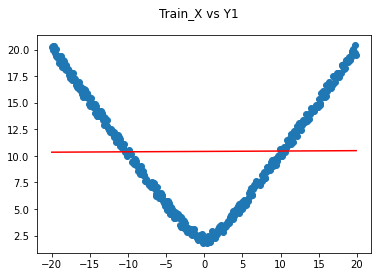

m1: -0.003621684232463916 c1: 10.41836258678837


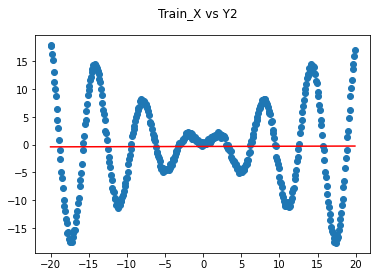

m2: -0.003621684232464045 c2: -0.32743225216662286


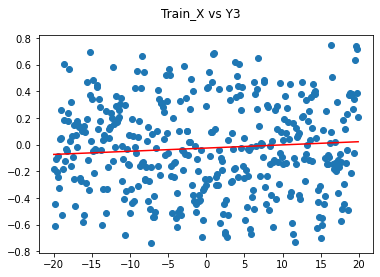

m3: -0.0023842755184542846 c3: -0.025871565844697686


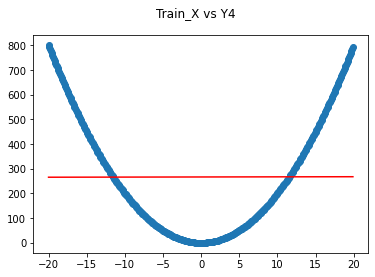

m4: -0.0511469068705168 c4: 266.65428967638155


In [25]:

#another way to make predictions and to plot the line of best fit using the formula 'prediction=m+X+c'

Y1_pred = m1*Train_X + c1

plt.scatter(Train_X, Train_Y1) # actual
plt.plot([min(Train_X), max(Train_X)], [min(Y1_pred), max(Y1_pred)], color='red') # predicted
plt.suptitle('Train_X vs Y1')
plt.show()
print('m1:',m1,'c1:',c1)

Y2_pred=m2*Train_X+c2

plt.scatter(Train_X, Train_Y2) # actual
plt.plot([min(Train_X), max(Train_X)], [min(Y2_pred), max(Y2_pred)], color='red') # predicted
plt.suptitle('Train_X vs Y2')
plt.show()
print('m2:',m2,'c2:',c2)

Y3_pred=m3*Train_X+c3

plt.scatter(Train_X, Train_Y3) # actual
plt.plot([min(Train_X), max(Train_X)], [min(Y3_pred), max(Y3_pred)], color='red') # predicted
plt.suptitle('Train_X vs Y3')
plt.show()
print('m3:',m3,'c3:',c3)

Y4_pred=m4*Train_X+c4

plt.scatter(Train_X, Train_Y4) # actual
plt.plot([min(Train_X), max(Train_X)], [min(Y4_pred), max(Y4_pred)], color='red') # predicted
plt.suptitle('Train_X vs Y4')
plt.show()
print('m4:',m4,'c4:',c4)
